<a href="https://colab.research.google.com/github/Arraj2611/my-codespace-/blob/main/neural_network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [19]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [20]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [21]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [22]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [23]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8710.1133 - mae: 8710.1133
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.8525 - mae: 7886.8525
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7603.2461 - mae: 7603.2461
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7538.2212 - mae: 7538.2212
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7710.3711 - mae: 7710.3711
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7571.5122 - mae: 7571.5122
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7680.5400 - mae: 7680.5400
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7752.9976 - mae: 7752.9976
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7512.7505 - mae: 7512.7505
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7685.2256 - mae: 7685.2256

In [24]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7299.4600 - mae: 7299.4600


[7299.4599609375, 7299.4599609375]

In [25]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

1. To (try) improve our model, we'll run 2 experiments:

2. Add an extra layer with more hidden units and use the Adam optimizer
3. Same as above but train for longer (200 epochs)
(insert your own experiment here)

In [26]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2           1         0          1           0   
 1285   47  24.320         0           1         0          1           0   
 1142   52  24.860         0           1         0          1           0   
 969    39  34.320         5           1         0          1           0   
 486    54  21.470         3           1         0          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4           1         0          1           0   
 1130   39  23.870         5           1         0          1           0   
 1294   58  25.175         0           0         1          1           0   
 860    37  47.600         2           1         0          0           1   
 1126   55  29.900         0           0         1          1           0   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [27]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13292.6494 - mae: 13292.6494
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13140.4092 - mae: 13140.4092
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12815.3047 - mae: 12815.3047
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12168.9473 - mae: 12168.9473
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 11067.5430 - mae: 11067.5430
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9619.9805 - mae: 9619.9805
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8259.8828 - mae: 8259.8828
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7554.1665 - mae: 7554.1665
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7425.4722 - mae: 7425.4722
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7405.1465 - mae:

In [28]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 5017.5366 - mae: 5017.5366


[5017.53662109375, 5017.53662109375]

In [29]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7299.4600 - mae: 7299.4600


[7299.4599609375, 7299.4599609375]

In [30]:
# Set random set
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13314.3135 - mae: 13314.3135
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13138.3213 - mae: 13138.3213
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12780.3633 - mae: 12780.3633
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12081.1836 - mae: 12081.1836
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10914.3662 - mae: 10914.3662
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9434.6562 - mae: 9434.6562
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8114.0000 - mae: 8114.0000
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7508.3262 - mae: 7508.3262
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7417.8442 - mae: 7417.8442
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7397.9761 - mae:

In [32]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 10ms/step - loss: 3482.8652 - mae: 3482.8652


[3482.865234375, 3482.865234375]

In [33]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7299.4600 - mae: 7299.4600


[7299.4599609375, 7299.4599609375]

Text(0.5, 0, 'epochs')

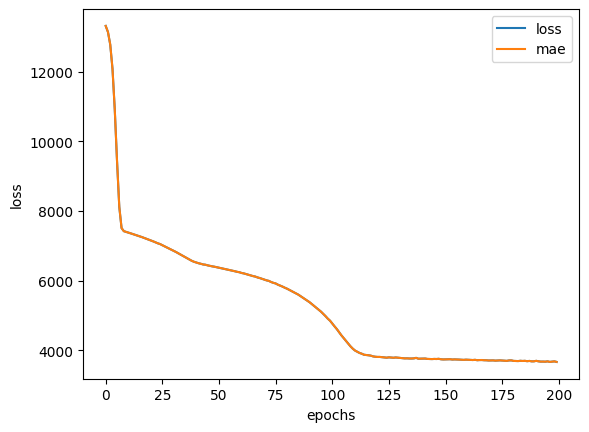

In [34]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

> 🤔 Question: How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping Callback, which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [36]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [37]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [38]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [39]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [40]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 6ms/step - loss: 13343.7061 - mae: 13343.7061
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13334.5986 - mae: 13334.5986
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 13311.6846 - mae: 13311.6846
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 13264.2627 - mae: 13264.2627
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13181.5000 - mae: 13181.5000
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 13052.7344 - mae: 13052.7344
Epoch 7/100
34/34 [==============================] - 0s 6ms/step - loss: 12867.5781 - mae: 12867.5781
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 12615.6611 - mae: 12615.6611
Epoch 9/100
34/34 [==============================] - 0s 8ms/step - loss: 12286.8154 - mae: 12286.8154
Epoch 10/100
34/34 [==============================] - 0s 14ms/step - loss: 11878.1

In [41]:
# Evalaute our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 3438.8254 - mae: 3438.8254


[3438.825439453125, 3438.825439453125]

Our model (`insurance_model_4`) fit on normalized data achieved a ~30% better score compared to the same model (`insurnace_model_2`) fit on non-normalized data!

Insurance model 2 results
 9/9 [==============================] - 0s 1ms/step - loss: 4924.3477 - mae: 4924.3477

In [42]:
insurance_model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               1200      
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
